# Power-of-Cosine Characteristic

In chapter 2.2, proportionalities of the gain $g(\vec r)$ were measured. It was found that
\begin{align}
g(r,\theta,\phi) \propto \frac{(cos\theta)^2 (cos\phi)^{32}}{r^2}
\end{align}
We will try that directivity on real data.

loaded data with shape torch.Size([1022, 192, 983])


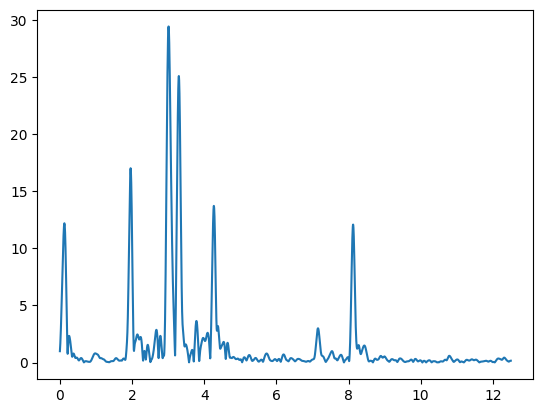

In [6]:
import os
os.chdir('/home/dgotzens/scripts/')

from timedataparser import load_all
from torch.fft import fft,ifft,fftshift,ifftshift
import matplotlib.pyplot as plt
import tools, torch
import numpy as np

header,_,data,_,params = load_all('/home/dgotzens/recording/exports_stability/23-10-09/', loadfeparams=True)
data = data[:,:,5]
nfft = 2**13
ranges = tools.ranges(header,nfft)
plt.plot(ranges[:nfft//2], tools.rangedata(data[:,0])[:nfft//2].abs(), label='9.10.')

In [30]:
M,K = data.shape
c0 = 299_792_458
β = params['RampSlope']
ω0 = 2*torch.pi*header['RampLowFrequency']
π = torch.pi
fs = 22e6
Ts = 1/fs

X,Y,Z = 1,160,240
N = X*Y*Z
points = torch.zeros((3, N))
for n in range(Z):
    for m in range(Y):
        points[1,Y*n+m] =  8.0 * m/Y - 4
        points[2,Y*n+m] = 12.0 * n/Z

tau = torch.empty((K,N))
rx = torch.tensor([params['rxPosX'], params['rxPosY'], [0]*K]).T.unsqueeze(-1)
tx = torch.tensor([params['txPosX'], params['txPosY'], [0]*K]).T.unsqueeze(-1)

print(rx.shape, points.shape, (rx-points).shape)

dist = (rx-points).square().sum(1).sqrt() + (tx-points).square().sum(1).sqrt() 
tau = dist / c0

    # a = (rx[:,k]-points.T).square().sum(1).sqrt()
    # b = (tx[:,k]-points.T).square().sum(1).sqrt()
    # tau[k,:] = (a+b) / c0

torch.Size([192, 3, 1]) torch.Size([3, 38400]) torch.Size([192, 3, 38400])
